# Compare lists of genes

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the genes that we used to run the model

list_genes = pd.read_csv('../data_input/list_genes.csv')

In [3]:
# load the diffGEK results

df = pd.read_csv('../results/statistics_aic.txt',index_col=0,header=None)

df.index = list_genes['Gene']

In [4]:
df[1].value_counts()

1    662
2    199
4    186
3     80
7     55
5     35
6     11
Name: 1, dtype: int64

In [5]:
# select only the signaficative genes

df_sig = df.loc[df[1] > 1]

In [6]:
# subset corresponding to significance

df_tr = df.loc[df[1] == 2]    # transcription only
df_sp = df.loc[df[1] == 3]    # splicing only
df_de = df.loc[df[1] == 4]    # degradation only
df_tr_sp = df.loc[df[1] == 5] # transcription and splicing
df_tr_de = df.loc[df[1] == 6] # transcription and degradation
df_sp_de = df.loc[df[1] == 7] # splicing and degradation
df_all = df.loc[df[1] == 8]   # all rates

In [7]:
# load tradeseq genes

tradeseq_all = pd.read_csv('../results/tradeseq_day3.csv',index_col=0)
tradeseq_all  = tradeseq_all.loc[tradeseq_all.padj <= 0.05].index

In [8]:
len(tradeseq_all)

85

In [9]:
# overlap diffGEK and traSeq

overlap_tr_ts = [gene for gene in tradeseq_all if gene in df_tr.index]
overlap_sp_ts = [gene for gene in tradeseq_all if gene in df_sp.index]
overlap_de_ts = [gene for gene in tradeseq_all if gene in df_de.index]
overlap_tr_sp_ts = [gene for gene in tradeseq_all if gene in df_tr_de.index]
overlap_tr_de_ts = [gene for gene in tradeseq_all if gene in df_tr_sp.index]
overlap_sp_de_ts = [gene for gene in tradeseq_all if gene in df_sp_de.index]
overlap_all_ts = [gene for gene in tradeseq_all if gene in df_all.index]

In [10]:
print(len(overlap_tr_ts))
print(len(overlap_sp_ts))
print(len(overlap_de_ts))
print(len(overlap_tr_sp_ts))
print(len(overlap_tr_de_ts))
print(len(overlap_sp_de_ts))
print(len(overlap_all_ts))

30
4
3
1
2
9
0


In [11]:
list_sp_no_overlap = [gene for gene in df_sp.index if gene not in tradeseq_all]

In [12]:
list_tr_no_overlap = [gene for gene in df_tr.index if gene not in tradeseq_all]

In [13]:
list_de_no_overlap = [gene for gene in df_de.index if gene not in tradeseq_all]

In [14]:
list_dk_no_overlap = [gene for gene in df_sig.index if gene not in tradeseq_all]

In [15]:
f = open("../results/list_genes_tr_no_overlap.txt", "a")
for gene in list_tr_no_overlap:
    f.write(gene)
    f.write('\n')
f.close()


In [16]:
f = open("../results/list_genes_tr.txt", "a")
for gene in df_tr.index:
    f.write(gene)
    f.write('\n')
f.close()


In [17]:
f = open("../results/list_genes_sp.txt", "a")
for gene in df_sp.index:
    f.write(gene)
    f.write('\n')
f.close()


In [18]:
f = open("../results/list_genes_sp_no_overlap.txt", "a")
for gene in list_sp_no_overlap:
    f.write(gene)
    f.write('\n')
f.close()


In [19]:
f = open("../results/list_genes_de.txt", "a")
for gene in df_de.index:
    f.write(gene)
    f.write('\n')
f.close()


In [20]:
f = open("../results/list_genes_de_no_overlap.txt", "a")
for gene in list_de_no_overlap:
    f.write(gene)
    f.write('\n')
f.close()


In [21]:
f = open("../results/list_genes_dk.txt", "a")
for gene in df_sig.index:
    f.write(gene)
    f.write('\n')
f.close()

In [22]:
f = open("../results/list_genes_dk_no_overlap.txt", "a")
for gene in list_dk_no_overlap:
    f.write(gene)
    f.write('\n')
f.close()

In [23]:
f = open("../results/list_tradeseq.txt", "a")
for gene in tradeseq_all:
    f.write(gene)
    f.write('\n')
f.close()

In [24]:
from venny4py.venny4py import *

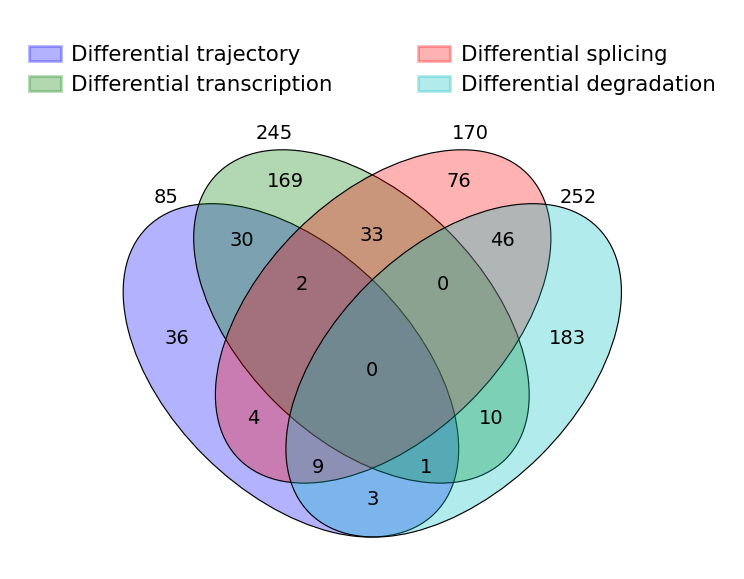

In [25]:
sets = {
    'Differential trajectory': set(list(tradeseq_all)),
    'Differential transcription': set(list(df.loc[(df[1] == 2)|(df[1] == 5)|(df[1] == 6)|(df[1] == 8)].index)),
    'Differential splicing': set(list(df.loc[(df[1] == 3)|(df[1] == 5)|(df[1] == 7)|(df[1] == 8)].index)),
    'Differential degradation': set(list(df.loc[(df[1] == 4)|(df[1] == 6)|(df[1] == 7)|(df[1] == 8)].index))}
    
venny4py(sets=sets,out='../figures/')

Hypergeometric test

In [26]:
len(tradeseq_all)

85

In [27]:
from scipy.stats import hypergeom as hg

testing transcription

In [28]:
hg(M=1228, n=199,N=85).sf(33-1)

1.4481964707489602e-07

testing splicing

In [29]:
hg(M=1228, n=170,N=85).sf(15-1)

0.18469080570596505

testing degradation

In [30]:
hg(M=1228, n=252,N=85).sf(13-1)

0.9195023349087418

All genes

In [31]:
hg(M=1228, n=245+4+9+3+76+46+183,N=85).sf(49-1)

0.017861861474028407